In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part A

* **DOMAIN** : Electronics and Telecommunication
* **CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

* **DATA DESCRIPTION**: The data set contains information on various signal tests performed:
1. *Parameters*: Various measurable signal parameters.
2. *Signal_Strength*: Final signal strength or quality
* **PROJECT OBJECTIV**E: To build a classifier which can use the given parameters to determine the signal strength or quality.

# Steps and tasks:

1. Data import and Understanding:

A. Read the ‘Signal.csv’ as DataFrame and import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers, regularizers
import tensorflow as tf
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INN Project/Signal.csv')
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


B. Check for missing values and print percentage for each attribute.

In [4]:
df.isnull().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


There are no missing values in the dataset.

C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [5]:
df.shape

(1599, 12)

In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(1359, 12)

D. Visualise distribution of the target variable.

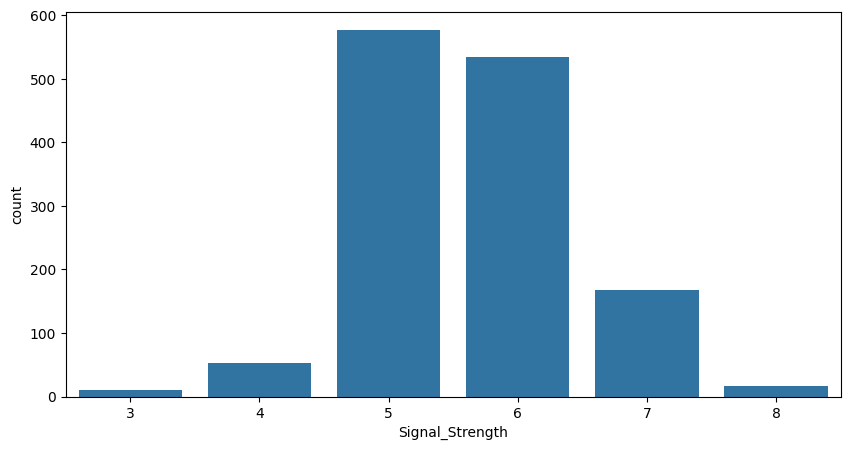

In [10]:
target = df['Signal_Strength']
plt.figure(figsize=(10, 5))
sns.countplot(x=target)
plt.show()

E. Share insights from the initial data analysis (at least 2).

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Insights:

1. Parameters 1, 4, 6 7 and 10 have potential outliers.
2. Parameters 2, 5, 8, 9 and 10 show relatively low variance.

In [12]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outlier_columns = ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
                   'Parameter 9', 'Parameter 10', 'Parameter 11']
for column in outlier_columns:
    lower, upper = detect_outliers_iqr(df, column)
    print(f"{column} - Lower bound: {lower}, Upper bound: {upper}")
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers in {column}: {len(outliers)} rows")


Parameter 1 - Lower bound: 3.95, Upper bound: 12.349999999999998
Outliers in Parameter 1: 41 rows
Parameter 2 - Lower bound: 0.015000000000000013, Upper bound: 1.0150000000000001
Outliers in Parameter 2: 19 rows
Parameter 3 - Lower bound: -0.42000000000000004, Upper bound: 0.94
Outliers in Parameter 3: 1 rows
Parameter 4 - Lower bound: 0.8499999999999996, Upper bound: 3.6500000000000004
Outliers in Parameter 4: 126 rows
Parameter 5 - Lower bound: 0.03850000000000002, Upper bound: 0.12249999999999998
Outliers in Parameter 5: 87 rows
Parameter 6 - Lower bound: -14.0, Upper bound: 42.0
Outliers in Parameter 6: 26 rows
Parameter 7 - Lower bound: -39.5, Upper bound: 124.5
Outliers in Parameter 7: 45 rows
Parameter 8 - Lower bound: 0.99227, Upper bound: 1.00115
Outliers in Parameter 8: 35 rows
Parameter 9 - Lower bound: 2.925, Upper bound: 3.6849999999999996
Outliers in Parameter 9: 28 rows
Parameter 10 - Lower bound: 0.28000000000000014, Upper bound: 0.9999999999999999
Outliers in Parameter

In [13]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

outlier_columns = ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5',
                   'Parameter 6', 'Parameter 7', 'Parameter 8', 'Parameter 9', 'Parameter 10', 'Parameter 11']

# Apply the capping function to all columns
for column in outlier_columns:
    cap_outliers(df, column)

print("Outliers have been capped.")

Outliers have been capped.


In [14]:
df.shape

(1359, 12)

# 2. Data preprocessing
A. Split the data into X & Y.

In [15]:
X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

B. Split the data into train & test with 70:30 proportion.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C. Print shape of all the 4 variables and verify if train and test data is in sync

In [17]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of y_train: (951,)
Shape of y_test: (408,)


D. Normalise the train and test data with appropriate method.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(951, 11)
(408, 11)


E. Transform Labels into format acceptable by Neural Network

In [19]:
label_encoder = LabelEncoder()
Y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
Y_test_encoded = to_categorical(label_encoder.transform(y_test))

# 3. Model Training & Evaluation using Neural Network
A. Design a Neural Network to train a classifier.

In [20]:
model = models.Sequential()
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


B. Train the classifier using previously designed Architecture

In [21]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history = model.fit(x=X_train_scaled, y=Y_train_encoded, batch_size=16, epochs=100, validation_data=(X_test_scaled, Y_test_encoded))

results = model.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results[1]}")

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3300 - loss: 1.7159 - val_accuracy: 0.3897 - val_loss: 1.4736
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3648 - loss: 1.4403 - val_accuracy: 0.4289 - val_loss: 1.2884
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4634 - loss: 1.2753 - val_accuracy: 0.5490 - val_loss: 1.1599
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5241 - loss: 1.1887 - val_accuracy: 0.5858 - val_loss: 1.0736
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5833 - loss: 1.0996 - val_accuracy: 0.6029 - val_loss: 1.0236
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5619 - loss: 1.0844 - val_accuracy: 0.6127 - val_loss: 0.9928
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5910 - loss: 1.0299 - val_accuracy: 0.6078 - val_loss: 0.9731
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5973 - loss: 0.9956 - val_accuracy: 0.6103 -

C. Plot 2 separate visuals

i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

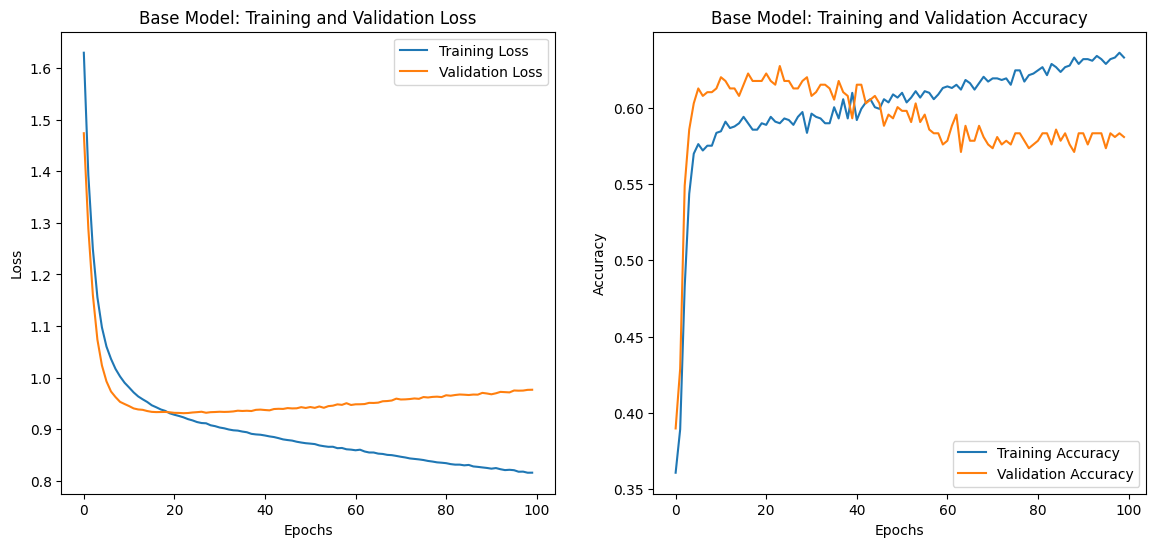

In [22]:
# Plotting training and validation loss
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Base Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Base Model: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

# Experimenting with multiple techniques

In [23]:
model_new = models.Sequential()
model_new.add(layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.005)))
model_new.add(layers.Dropout(0.6))
model_new.add(layers.BatchNormalization())
# model_new.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
# model_new.add(layers.Dropout(0.5))
# model_new.add(layers.BatchNormalization())
# model_new.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
# model_new.add(layers.Dropout(0.5))
# model_new.add(layers.BatchNormalization())
model_new.add(layers.Dense(8, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.005)))
model_new.add(layers.LeakyReLU(alpha=0.1))
model_new.add(layers.Dropout(0.3))
model_new.add(layers.BatchNormalization())
model_new.add(layers.Dense(6, activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.001)

model_new.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

history_new = model_new.fit(x=X_train_scaled, y=Y_train_encoded, batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded), callbacks=[early_stopping,lr_schedule])

results_new = model_new.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_new[1]}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1847 - loss: 2.2918 - val_accuracy: 0.1642 - val_loss: 2.1299 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1981 - loss: 2.2510 - val_accuracy: 0.2794 - val_loss: 1.9682 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2593 - loss: 2.1549 - val_accuracy: 0.3358 - val_loss: 1.8539 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 1.9551 - val_accuracy: 0.3922 - val_loss: 1.7606 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3559 - loss: 1.8897 - val_accuracy: 0.4608 - val_loss: 1.6839 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3786 - loss: 1.8265 - val_accuracy: 0.4926 - val_loss: 1.6156 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3473 - loss: 1.8167 - val_accuracy: 0.50

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model architecture
model_try_1 = models.Sequential()

# First hidden layer
model_try_1.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l2(0.005)))
model_try_1.add(layers.Dropout(0.4))  # Adjusted dropout rate
model_try_1.add(layers.BatchNormalization())

# Second hidden layer
model_try_1.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_try_1.add(layers.Dropout(0.4))
model_try_1.add(layers.BatchNormalization())

# Third hidden layer (optional)
model_try_1.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.005)))
model_try_1.add(layers.LeakyReLU(alpha=0.1))
model_try_1.add(layers.Dropout(0.3))
model_try_1.add(layers.BatchNormalization())

# Output layer
model_try_1.add(layers.Dense(6, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0005)  # Lowered learning rate
model_try_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model
history_new = model_try_1.fit(x=X_train_scaled, y=Y_train_encoded,
                            batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded),
                            callbacks=[early_stopping, lr_schedule])

# Evaluate the model
results_try_1 = model_try_1.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results[1]}")


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1328 - loss: 2.4291 - val_accuracy: 0.1029 - val_loss: 2.0663 - learning_rate: 5.0000e-04
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1592 - loss: 2.2723 - val_accuracy: 0.1103 - val_loss: 2.0564 - learning_rate: 5.0000e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1564 - loss: 2.2380 - val_accuracy: 0.1593 - val_loss: 2.0313 - learning_rate: 5.0000e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1856 - loss: 2.1735 - val_accuracy: 0.2353 - val_loss: 1.9969 - learning_rate: 5.0000e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1718 - loss: 2.1731 - val_accuracy: 0.2990 - val_loss: 1.9623 - learning_rate: 5.0000e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2191 - loss: 2.0746 - val_accuracy: 0.3505 - val_loss: 1.9213 - learning_rate: 5.0000e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2269

In [25]:
model_try_2 = models.Sequential()

model_try_2.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],),
                       kernel_regularizer=regularizers.l2(0.001)))
model_try_2.add(layers.Dropout(0.5))
model_try_2.add(layers.BatchNormalization())

model_try_2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_try_2.add(layers.Dropout(0.5))
model_try_2.add(layers.BatchNormalization())

model_try_2.add(layers.Dense(6, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with categorical cross-entropy
model_try_2.compile(
    loss="categorical_crossentropy",  # Use categorical cross-entropy
    metrics=["accuracy"],
    optimizer=optimizer
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history_try_2 = model_try_2.fit(
    x=X_train_scaled,
    y=Y_train_encoded,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_scaled, Y_test_encoded),
    callbacks=[early_stopping]
)

results_try_2 = model_try_2.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_try_2[1]}")

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1526 - loss: 2.1890 - val_accuracy: 0.2917 - val_loss: 1.8534
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2021 - loss: 2.0417 - val_accuracy: 0.3848 - val_loss: 1.7163
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2414 - loss: 1.9284 - val_accuracy: 0.4853 - val_loss: 1.6163
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3324 - loss: 1.7962 - val_accuracy: 0.5172 - val_loss: 1.5291
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3480 - loss: 1.7132 - val_accuracy: 0.5294 - val_loss: 1.4531
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3674 - loss: 1.6038 - val_accuracy: 0.5515 - val_loss: 1.3847
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4594 - loss: 1.5355 - val_accuracy: 0.5515 - val_loss: 1.3312
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4248 - loss: 1.4641 - val_accuracy: 0.5441 -

In [26]:
# Define the model architecture
model_try_3 = models.Sequential()

# First hidden layer
model_try_3.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)))
model_try_3.add(layers.Dropout(0.4))
model_try_3.add(layers.BatchNormalization())

# Second hidden layer
model_try_3.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_try_3.add(layers.Dropout(0.4))
model_try_3.add(layers.BatchNormalization())

# Third hidden layer
model_try_3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_try_3.add(layers.Dropout(0.4))
model_try_3.add(layers.BatchNormalization())

# Output layer
model_try_3.add(layers.Dense(6, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model_try_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history_try_3 = model_try_3.fit(x=X_train_scaled, y=Y_train_encoded,
                            batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded),
                            callbacks=[early_stopping])
results_try_3 = model_try_3.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_try_3[1]}")

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1757 - loss: 2.3015 - val_accuracy: 0.3431 - val_loss: 1.8027
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2027 - loss: 2.1628 - val_accuracy: 0.4265 - val_loss: 1.7526
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2328 - loss: 2.0508 - val_accuracy: 0.4926 - val_loss: 1.6899
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3356 - loss: 1.8383 - val_accuracy: 0.5196 - val_loss: 1.6252
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3441 - loss: 1.8190 - val_accuracy: 0.5417 - val_loss: 1.5644
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3882 - loss: 1.7477 - val_accuracy: 0.5515 - val_loss: 1.5033
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3992 - loss: 1.7440 - val_accuracy: 0.5735 - val_loss: 1.4493
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4737 - loss: 1.5449 - val_accuracy: 0.5735 -

In [27]:
# Define the model architecture
model_try_4 = models.Sequential()

# First hidden layer
model_try_4.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)))
model_try_4.add(layers.Dropout(0.4))
model_try_4.add(layers.BatchNormalization())

# Second hidden layer
model_try_4.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.001))) # Changed activation function
model_try_4.add(layers.Dropout(0.3)) # Adjusted dropout rate
model_try_4.add(layers.BatchNormalization())

# Third hidden layer
model_try_4.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_try_4.add(layers.Dropout(0.2)) # Adjusted dropout rate
model_try_4.add(layers.BatchNormalization())

# Output layer
model_try_4.add(layers.Dense(6, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model_try_4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15) # Increased patience
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model
history_try_4 = model_try_4.fit(x=X_train_scaled, y=Y_train_encoded,
                            batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded),
                            callbacks=[early_stopping, lr_schedule])

results_try_4 = model_try_4.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_try_4[1]}")

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1695 - loss: 2.3818 - val_accuracy: 0.4853 - val_loss: 1.6852 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2426 - loss: 2.0864 - val_accuracy: 0.5270 - val_loss: 1.5761 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3330 - loss: 1.8518 - val_accuracy: 0.5466 - val_loss: 1.4925 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3902 - loss: 1.7073 - val_accuracy: 0.5515 - val_loss: 1.4288 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4055 - loss: 1.6490 - val_accuracy: 0.5588 - val_loss: 1.3764 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4384 - loss: 1.5871 - val_accuracy: 0.5686 - val_loss: 1.3253 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4843 - loss: 1.4982 - val_ac

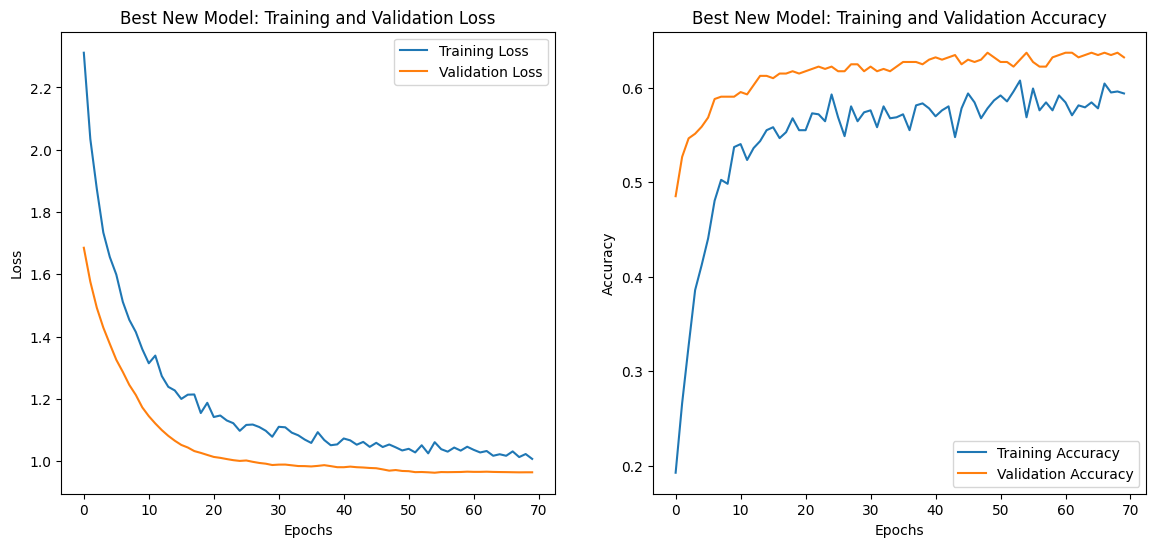

In [28]:
# Plotting training and validation loss
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_try_4.history['loss'], label='Training Loss')
plt.plot(history_try_4.history['val_loss'], label='Validation Loss')
plt.title('Best New Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_try_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_try_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best New Model: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
# Define the model architecture
model_try_5 = models.Sequential()

# First hidden layer
model_try_5.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
model_try_5.add(layers.Dropout(0.4))
model_try_5.add(layers.BatchNormalization())

# Second hidden layer
model_try_5.add(layers.Dense(32, activation='tanh',
                             kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001))) # Changed activation function
model_try_5.add(layers.Dropout(0.3)) # Adjusted dropout rate
model_try_5.add(layers.BatchNormalization())

# Third hidden layer
model_try_5.add(layers.Dense(16, activation='relu',
                             kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
model_try_5.add(layers.Dropout(0.2)) # Adjusted dropout rate
model_try_5.add(layers.BatchNormalization())

# Output layer
model_try_5.add(layers.Dense(6, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model_try_5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15) # Increased patience
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model
history_try_5 = model_try_5.fit(x=X_train_scaled, y=Y_train_encoded,
                            batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded),
                            callbacks=[early_stopping, lr_schedule])

results_try_5 = model_try_5.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_try_5[1]}")

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.2274 - loss: 6.8161 - val_accuracy: 0.4289 - val_loss: 5.9789 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2658 - loss: 6.2902 - val_accuracy: 0.5196 - val_loss: 5.6578 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3195 - loss: 5.9221 - val_accuracy: 0.5539 - val_loss: 5.3263 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3838 - loss: 5.4872 - val_accuracy: 0.5882 - val_loss: 5.0033 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4199 - loss: 5.1565 - val_accuracy: 0.5956 - val_loss: 4.7036 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4699 - loss: 4.8556 - val_accuracy: 0.6054 - val_loss: 4.4224 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4773 - loss: 4.5721 - va

In [30]:
# Define the model architecture
model_try_6 = models.Sequential()

# First hidden layer
model_try_6.add(layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)))
model_try_6.add(layers.Dropout(0.5))
model_try_6.add(layers.BatchNormalization())

# Second hidden layer
model_try_6.add(layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001))) # Changed activation function
model_try_6.add(layers.Dropout(0.4)) # Adjusted dropout rate
model_try_6.add(layers.BatchNormalization())

# Third hidden layer
model_try_6.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model_try_6.add(layers.Dropout(0.3)) # Adjusted dropout rate
model_try_6.add(layers.BatchNormalization())

# Fourth hidden layer
model_try_6.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_try_6.add(layers.Dropout(0.2)) # Adjusted dropout rate
model_try_6.add(layers.BatchNormalization())

# Output layer
model_try_6.add(layers.Dense(6, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model_try_6.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15) # Increased patience
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model
history_try_6 = model_try_6.fit(x=X_train_scaled, y=Y_train_encoded,
                            batch_size=32, epochs=100,
                            validation_data=(X_test_scaled, Y_test_encoded),
                            callbacks=[early_stopping, lr_schedule])

results_try_6 = model_try_6.evaluate(X_test_scaled, Y_test_encoded)
print(f"Test Accuracy: {results_try_6[1]}")

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1575 - loss: 2.3950 - val_accuracy: 0.3603 - val_loss: 1.8476 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2178 - loss: 2.1477 - val_accuracy: 0.4926 - val_loss: 1.7093 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3031 - loss: 1.9416 - val_accuracy: 0.5221 - val_loss: 1.5989 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3371 - loss: 1.8424 - val_accuracy: 0.5417 - val_loss: 1.5089 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4393 - loss: 1.6782 - val_accuracy: 0.5245 - val_loss: 1.4447 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4218 - loss: 1.6770 - val_accuracy: 0.5319 - val_loss: 1.4035 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4383 - loss: 1.5992 - val_ac

E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

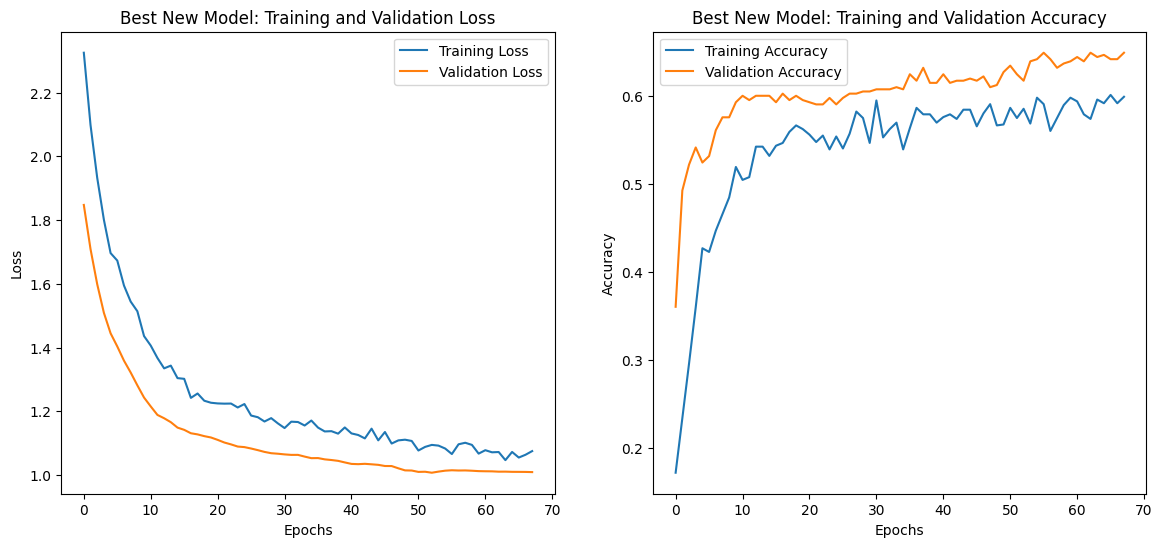

In [31]:
# Plotting training and validation loss
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_try_6.history['loss'], label='Training Loss')
plt.plot(history_try_6.history['val_loss'], label='Validation Loss')
plt.title('Best New Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_try_6.history['accuracy'], label='Training Accuracy')
plt.plot(history_try_6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best New Model: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Insights:**

*Better Convergence*: The overall training process looks smoother, and the accuracy of the model has improved. The loss is decreasing at a steady rate and both training and validation metrics are more aligned.

*No Overfitting*: The model continues to generalize well, with validation accuracy outperforming training, but the gap is not too wide, so it suggests the model has a good balance between training and validation.

*Improved Stability*: The model exhibits less fluctuation in both accuracy and loss over time, indicating that it has stabilized, and further training might not lead to significant improvements.

# Part B

*   **DOMAIN**: Autonomous Vehicles
*   **CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.
*   **DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.
*   **PROJECT OBJECTIVE**: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

## Steps and tasks:

1. Data Import and Exploration

A. Read the .h5 file and assign to a variable.

In [72]:
import h5py

file_path = "/content/drive/MyDrive/Colab Notebooks/INN Project/Autonomous_Vehicles_SVHN_single_grey1 (1).h5"

h5_file = h5py.File(file_path, 'r')

B. Print all the keys from the .h5 file.

In [73]:
keys = list(h5_file.keys())
print(keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


C. Split the data into X_train, X_test, Y_train, Y_test

In [74]:
X_train = h5_file['X_train'][:]
X_test = h5_file['X_test'][:]
Y_train = h5_file['y_train'][:]
Y_test = h5_file['y_test'][:]

h5_file.close()

## 2. Data Visualisation and preprocessing
A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [75]:
# Print shapes of X_train, X_test, Y_train, and Y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
Y_train shape: (42000,)
Y_test shape: (18000,)


B. Visualise first 10 images in train data and print its corresponding labels.

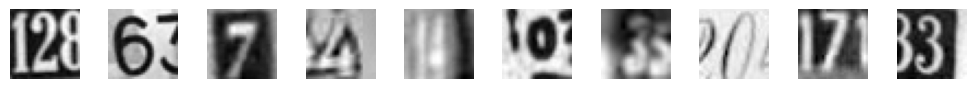

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Display in grayscale
    plt.axis('off')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


C. Reshape all the images with appropriate shape update the data in same variable.

In [77]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

print("X_train reshaped:", X_train.shape)
print("X_test reshaped:", X_test.shape)


X_train reshaped: (42000, 32, 32, 1)
X_test reshaped: (18000, 32, 32, 1)


D. Normalise the images i.e. Normalise the pixel values.

In [78]:
# Normalize pixel values to the range [0, 1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

print("X_train normalized:", X_train_norm.shape)
print("X_test normalized:", X_test_norm.shape)

X_train normalized: (42000, 32, 32, 1)
X_test normalized: (18000, 32, 32, 1)


E. Transform Labels into format acceptable by Neural Network

In [79]:
from tensorflow.keras.utils import to_categorical

Y_train_oh = to_categorical(Y_train, num_classes=10)
Y_test_oh = to_categorical(Y_test, num_classes=10)

print("Y_train transformed:", Y_train_oh.shape)
print("Y_test transformed:", Y_test_oh.shape)

print("First 5 training lables as one-hot encoded vectors:\n", Y_train_oh[:5])

Y_train transformed: (42000, 10)
Y_test transformed: (18000, 10)
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


F. Print total Number of classes in the Dataset.

In [80]:
num_classes = len(np.unique(Y_train))
print("Total number of classes:", num_classes)


Total number of classes: 10


## 3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier.

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras import losses, optimizers

image_size = 32 * 32  # Flattened image size

num_classes = 10

# Create the model
b_model = Sequential()

# Reshape the input images to (1024,) because out data is in grey-scale
b_model.add(Reshape((image_size,), input_shape=(32, 32, 1)))

# Add multiple Dense layers with ReLU activation
b_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
b_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

# Output layer with 'softmax' for multiclass classification
b_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
b_model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

# Print the model summary
b_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_5 (Reshape)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,418 (1.09 MB)

 Trainable params: 285,418 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [81]:
# Train the model
b_history = b_model.fit(X_train, Y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = b_model.evaluate(X_test, Y_test_oh, verbose=2)

print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1078 - loss: 19.0584 - val_accuracy: 0.1140 - val_loss: 2.7068
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1323 - loss: 2.6097 - val_accuracy: 0.1700 - val_loss: 2.3207
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1666 - loss: 2.3950 - val_accuracy: 0.2656 - val_loss: 2.0396
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2451 - loss: 2.1052 - val_accuracy: 0.3393 - val_loss: 2.0262
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3341 - loss: 1.9037 - val_accuracy: 0.4554 - val_loss: 1.6404
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4331 - loss: 1.6502 - val_accuracy: 0.3935 - val_loss: 1.7641
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.4731 - loss: 1.5601 - val_accuracy: 0.5102 - val_loss: 1.4904
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5003 - loss: 1.

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model definition
b1_model = Sequential()

# Reshaping the input
b1_model.add(Reshape((image_size,), input_shape=(32, 32, 1)))

# Add Dense layers with Dropout and BatchNormalization
b1_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
b1_model.add(BatchNormalization())
b1_model.add(Dropout(0.5))

b1_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b1_model.add(BatchNormalization())
b1_model.add(Dropout(0.5))

b1_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

b1_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

# Output layer
b1_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a different learning rate
b1_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
b1_history = b1_model.fit(X_train, Y_train_oh, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = b1_model.evaluate(X_test, Y_test_oh)
print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1043 - loss: 2.4725 - val_accuracy: 0.1481 - val_loss: 2.2538
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1622 - loss: 2.2204 - val_accuracy: 0.1988 - val_loss: 2.2182
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2311 - loss: 2.0718 - val_accuracy: 0.3511 - val_loss: 1.8932
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2665 - loss: 1.9601 - val_accuracy: 0.2950 - val_loss: 1.9436
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2625 - loss: 1.9760 - val_accuracy: 0.3664 - val_loss: 1.8073
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2900 - loss: 1.9072 - val_accuracy: 0.4225 - val_loss: 1.7275
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3032 - loss: 1.8836 - val_accuracy: 0.4374 - val_loss: 1.6698
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3141 - loss: 1.851

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set the number of classes (adjust as per your dataset)
num_classes = 10

# Create the model
b2_model = Sequential()

# Flatten layer to convert 2D image to 1D vector
b2_model.add(Reshape((image_size,), input_shape=(32, 32, 1)))

# Add Dense layers with Dropout and BatchNormalization
b2_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
b2_model.add(BatchNormalization())
b2_model.add(Dropout(0.5))

b2_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b2_model.add(BatchNormalization())
b2_model.add(Dropout(0.5))

b2_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

b2_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

# Output Layer
b2_model.add(Dense(num_classes, activation='softmax'))

optimizer=Adam(learning_rate=0.001)

# Compile the model
b2_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
b2_history = b2_model.fit(
    X_train, Y_train_oh,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on test data
test_loss, test_acc = b2_model.evaluate(X_test, Y_test_oh)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1080 - loss: 2.4841 - val_accuracy: 0.1331 - val_loss: 2.2865 - learning_rate: 0.0010
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1408 - loss: 2.2690 - val_accuracy: 0.1405 - val_loss: 2.1953 - learning_rate: 0.0010
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2667 - loss: 1.9935 - val_accuracy: 0.4051 - val_loss: 1.7007 - learning_rate: 0.0010
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3324 - loss: 1.8471 - val_accuracy: 0.2650 - val_loss: 2.1079 - learning_rate: 0.0010
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3688 - loss: 1.7553 - val_accuracy: 0.4504 - val_loss: 1.5681 - learning_rate: 0.0010
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3778 - loss: 1.7227 - val_accuracy: 0.4704 - val_loss: 1.5180 - learning_rate: 0.0010
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3919 - loss: 1.67

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model definition
b3_model = Sequential()

b3_model.add(Reshape((image_size,), input_shape=(32, 32, 1)))

# Add Dense layers with Dropout and BatchNormalization
b3_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
b3_model.add(BatchNormalization())
b3_model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))

b3_model.add(Dense(64, activation='tanh', kernel_initializer='he_uniform'))
b3_model.add(BatchNormalization())
b3_model.add(Dropout(0.5))

b3_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

b3_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

# Output layer
b3_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a different learning rate
b3_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

# Train the model
b3_history = b3_model.fit(X_train, Y_train_oh, epochs=10, batch_size=64, validation_split=0.2, callbacks=reduce_lr)

# Evaluate the model
test_loss, test_acc = b3_model.evaluate(X_test, Y_test_oh)
print(f'Test accuracy: {test_acc:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1029 - loss: 3.1081 - val_accuracy: 0.1239 - val_loss: 2.3558 - learning_rate: 1.0000e-04
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1143 - loss: 2.4984 - val_accuracy: 0.1600 - val_loss: 2.2576 - learning_rate: 1.0000e-04
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1286 - loss: 2.3701 - val_accuracy: 0.1999 - val_loss: 2.1722 - learning_rate: 1.0000e-04
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1523 - loss: 2.2865 - val_accuracy: 0.2563 - val_loss: 2.0787 - learning_rate: 1.0000e-04
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1940 - loss: 2.1912 - val_accuracy: 0.3406 - val_loss: 1.9255 - learning_rate: 1.0000e-04
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2562 - loss: 2.0555 - val_accuracy: 0.3800 - val_loss: 1.8037 - learning_rate: 1.0000e-04
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accurac

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

b4_model = Sequential()

b4_model.add(Reshape((image_size,), input_shape=(32, 32, 1)))

# Increased neurons and LeakyReLU
b4_model.add(Dense(512))
b4_model.add(LeakyReLU(alpha=0.3))
b4_model.add(BatchNormalization())
b4_model.add(Dropout(0.5))

# Added another layer
b4_model.add(Dense(128))
b4_model.add(LeakyReLU(alpha=0.3))
b4_model.add(BatchNormalization())
b4_model.add(Dropout(0.4))

b4_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b4_model.add(BatchNormalization())
b4_model.add(Dropout(0.5))

b4_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
b4_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

b4_model.add(Dense(num_classes, activation='softmax'))

# Increased learning rate
b4_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

b4_history = b4_model.fit(X_train, Y_train_oh, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_acc = b4_model.evaluate(X_test, Y_test_oh)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1038 - loss: 2.4708 - val_accuracy: 0.1381 - val_loss: 2.2751
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.1809 - loss: 2.1751 - val_accuracy: 0.3752 - val_loss: 1.7027
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3337 - loss: 1.8219 - val_accuracy: 0.4406 - val_loss: 1.5833
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4100 - loss: 1.6680 - val_accuracy: 0.4857 - val_loss: 1.4409
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4532 - loss: 1.5738 - val_accuracy: 0.3912 - val_loss: 1.7047
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4736 - loss: 1.5143 - val_accuracy: 0.5617 - val_loss: 1.3042
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.4879 - loss: 1.4861 - val_accuracy: 0.5682 - val_loss: 1.2975
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5016 -

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

b5_model = Sequential()

# Reshape the input (flatten the 32x32x1 image into a vector)
b5_model.add(Reshape((32 * 32,), input_shape=(32, 32, 1)))

# First Dense Layer
b5_model.add(Dense(1024, kernel_initializer='he_uniform'))
b5_model.add(BatchNormalization())
b5_model.add(LeakyReLU(alpha=0.3))
b5_model.add(Dropout(0.5))

# Second Dense Layer
b4_model.add(Dense(512, kernel_initializer='he_uniform'))
b4_model.add(BatchNormalization())
b4_model.add(LeakyReLU(alpha=0.3))
b4_model.add(Dropout(0.4))

# Third Dense Layer
b5_model.add(Dense(256, kernel_initializer='he_uniform'))
b5_model.add(BatchNormalization())
b5_model.add(LeakyReLU(alpha=0.3))
b5_model.add(Dropout(0.3))

# Fourth Dense Layer
b5_model.add(Dense(128, kernel_initializer='he_uniform'))
b5_model.add(BatchNormalization())
b5_model.add(LeakyReLU(alpha=0.3))
b5_model.add(Dropout(0.3))

# Final Output Layer
b5_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
b5_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
b5_history = b5_model.fit(X_train, Y_train_oh, epochs=20, batch_size=32, validation_split=0.2,
                          callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_acc = b5_model.evaluate(X_test, Y_test_oh)
print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.1979 - loss: 2.3030 - val_accuracy: 0.5713 - val_loss: 1.3759 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.4955 - loss: 1.5138 - val_accuracy: 0.6218 - val_loss: 1.2008 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.5668 - loss: 1.3380 - val_accuracy: 0.5446 - val_loss: 1.4199 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6006 - loss: 1.2623 - val_accuracy: 0.7007 - val_loss: 1.0129 - learning_rate: 0.0010
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.6108 - loss: 1.2193 - val_accuracy: 0.5993 - val_loss: 1.2419 - learning_rate: 0.0010
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.6269 - loss: 1.1876 - val_accuracy: 0.6685 - val_loss: 1.0646 - learning_rate: 0.0010
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accura

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

b6_model = Sequential()

# Reshape the input (flatten the 32x32x1 image into a vector)
b6_model.add(Reshape((32 * 32,), input_shape=(32, 32, 1)))

# First Dense Layer
b6_model.add(Dense(1024, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
b6_model.add(BatchNormalization())
b6_model.add(LeakyReLU(alpha=0.1))  # Slightly reduced alpha for LeakyReLU
b6_model.add(Dropout(0.4))  # Reduced dropout

# Second Dense Layer
b6_model.add(Dense(512, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
b6_model.add(BatchNormalization())
b6_model.add(LeakyReLU(alpha=0.1))
b6_model.add(Dropout(0.3))  # Reduced dropout

# Third Dense Layer
b6_model.add(Dense(256, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
b6_model.add(BatchNormalization())
b6_model.add(LeakyReLU(alpha=0.1))
b6_model.add(Dropout(0.2))  # Reduced dropout

# Fourth Dense Layer (Optional)
b6_model.add(Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
b6_model.add(BatchNormalization())
b6_model.add(LeakyReLU(alpha=0.1))
b6_model.add(Dropout(0.2))  # Reduced dropout

# Final Output Layer
b6_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a lower learning rate
b6_model.compile(optimizer=Adam(learning_rate=0.0005),  # Reduced initial learning rate
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model for more epochs
b6_history = b6_model.fit(X_train, Y_train_oh,
                          epochs=50,  # Increased epochs for more training
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stopping, lr_scheduler, checkpoint])

# Evaluate the model
test_loss, test_acc = b6_model.evaluate(X_test, Y_test_oh)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.2202 - loss: 2.2148 - val_accuracy: 0.5625 - val_loss: 1.3655 - learning_rate: 5.0000e-04
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.5512 - loss: 1.3702 - val_accuracy: 0.6340 - val_loss: 1.1580 - learning_rate: 5.0000e-04
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6163 - loss: 1.2034 - val_accuracy: 0.6685 - val_loss: 1.0559 - learning_rate: 5.0000e-04
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 47ms/step - accuracy: 0.6458 - loss: 1.1098 - val_accuracy: 0.6243 - val_loss: 1.1468 - learning_rate: 5.0000e-04
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.6634 - loss: 1.0635 - val_accuracy: 0.7288 - val_loss: 0.9070 - learning_rate: 5.0000e-04
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6876 - loss: 0.9859 - val_accuracy: 0.7242 - val_loss: 0.8765 - learning_rate: 5.0000e-04
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━

C. Evaluate performance of the model with appropriate metrics

563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1814
           1       0.83      0.90      0.86      1828
           2       0.91      0.88      0.89      1803
           3       0.86      0.81      0.84      1719
           4       0.89      0.90      0.89      1812
           5       0.84      0.87      0.86      1768
           6       0.89      0.85      0.87      1832
           7       0.89      0.90      0.90      1808
           8       0.89      0.82      0.85      1812
           9       0.86      0.85      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



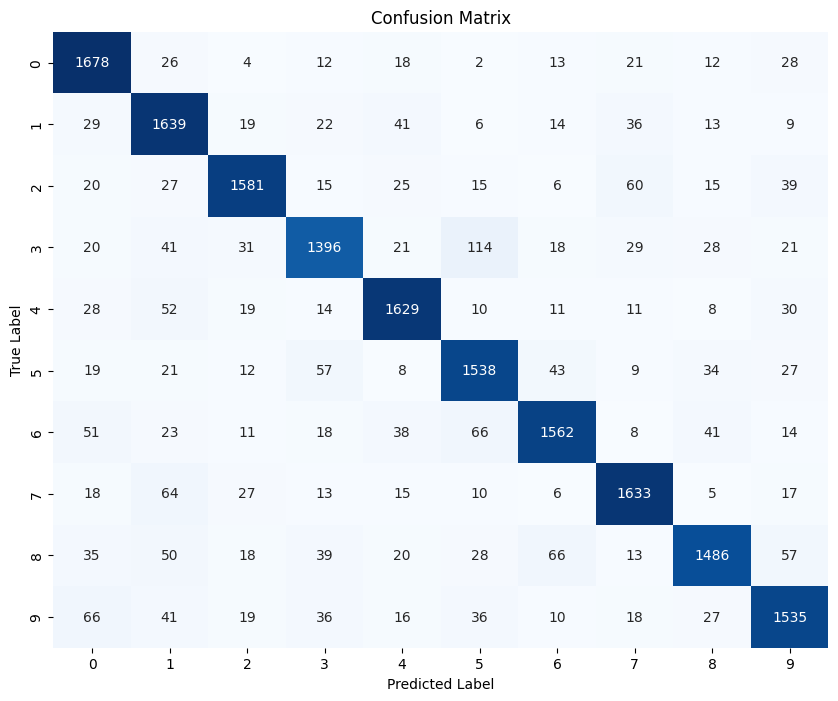

In [126]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred_oh = b6_model.predict(X_test)

# Convert one-hot encoded predictions and true labels back to class indices
y_pred = np.argmax(y_pred_oh, axis=1)
Y_test = np.argmax(Y_test_oh, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


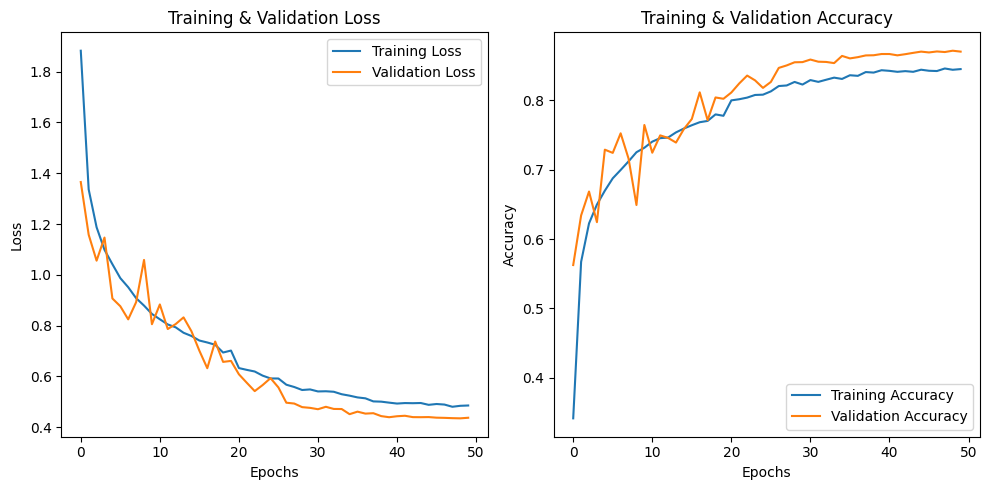

In [128]:
import matplotlib.pyplot as plt

# Extract metrics from history object
history = b6_history.history

# Plot training & validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Observations**:

*   ***No overfitting***: The training and validation curves remain relatively close,indicating good generalization.
*   ***Stabilization***: Both loss and accuracy metrics stabilize after 40 epochs, suggesting that the model has learned most of the useful information.
*   ***Performance***: The model performs well with training accuracy around 85% and validation accuracy around 90%, which is promising for the project objective.